In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [67]:
dat = pd.read_csv('인천광역시 중구_쓰레기종량제봉투_발주정보_20200915.csv', engine='python', encoding='CP949')

In [68]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전표번호     1409 non-null   object 
 1   발주일자     1409 non-null   object 
 2   봉투 종류    1409 non-null   object 
 3   협회코드     1409 non-null   int64  
 4   제작업체     1409 non-null   object 
 5   수량       1409 non-null   int64  
 6   조달수수료    1409 non-null   float64
 7   조달단가     1409 non-null   float64
 8   금액       1409 non-null   int64  
 9   미입고수량    1409 non-null   int64  
 10  수정구분     1409 non-null   object 
 11  수정일자     1409 non-null   object 
 12  LOT발생구분  1409 non-null   int64  
 13  전송구분     1409 non-null   int64  
 14  데이터기준일자  1409 non-null   object 
dtypes: float64(2), int64(6), object(7)
memory usage: 165.2+ KB


In [69]:
dat

,전표번호,발주일자,봉투 종류,협회코드,제작업체,수량,조달수수료,조달단가,금액,미입고수량,수정구분,수정일자,LOT발생구분,전송구분,데이터기준일자
0,A00000001,2000-12-13,일반용 5L,1,영광산업,20000,0.8,13.35,267000,0,M,2001-01-11,1,1,2020-09-15
1,A00000001,2000-12-13,일반용 5L,1,영광산업,20000,0.8,13.35,267000,0,M,2001-01-11,1,1,2020-09-15
2,A00000002,2000-12-13,일반용 10L,1,영광산업,100000,0.8,17.05,1705000,0,M,2001-01-11,1,1,2020-09-15
3,A00000002,2000-12-13,일반용 10L,1,영광산업,100000,0.8,17.05,1705000,0,M,2001-01-11,1,1,2020-09-15
4,A00000004,2000-12-13,일반용 20L,1,영광산업,300000,0.8,26.97,8091000,0,M,2001-01-11,1,1,2020-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,A00001576,2020-04-21,재활용 100L(비닐류),1,영광산업,39600,0.0,1.00,39600,39600,M,2020-04-21,1,0,2020-09-15
1405,A00001585,2020-04-21,재활용 100L(투명PET),1,영광산업,39600,0.0,1.00,39600,39600,M,2020-04-21,1,0,2020-09-15
1406,A00001595,2020-04-21,재활용 100L(종이류),1,영광산업,39600,0.0,1.00,39600,39600,M,2020-04-21,1,0,2020-09-15
1407,A00001606,2020-04-21,"재활용 100L(캔,유리,플라스틱)",1,영광산업,39600,0.0,1.00,39600,39600,M,2020-04-21,1,0,2020-09-15


In [70]:
dat['new_date'] = pd.to_datetime(dat['발주일자'])
dat['year'] = dat['new_date'].dt.year
dat['month'] = dat['new_date'].dt.month
dat['day'] = dat['new_date'].dt.day
dat['dayname'] = dat['new_date'].dt.day_name()

In [71]:
dat

,전표번호,발주일자,봉투 종류,협회코드,제작업체,수량,조달수수료,조달단가,금액,미입고수량,수정구분,수정일자,LOT발생구분,전송구분,데이터기준일자,new_date,year,month,day,dayname
0,A00000001,2000-12-13,일반용 5L,1,영광산업,20000,0.8,13.35,267000,0,M,2001-01-11,1,1,2020-09-15,2000-12-13,2000,12,13,Wednesday
1,A00000001,2000-12-13,일반용 5L,1,영광산업,20000,0.8,13.35,267000,0,M,2001-01-11,1,1,2020-09-15,2000-12-13,2000,12,13,Wednesday
2,A00000002,2000-12-13,일반용 10L,1,영광산업,100000,0.8,17.05,1705000,0,M,2001-01-11,1,1,2020-09-15,2000-12-13,2000,12,13,Wednesday
3,A00000002,2000-12-13,일반용 10L,1,영광산업,100000,0.8,17.05,1705000,0,M,2001-01-11,1,1,2020-09-15,2000-12-13,2000,12,13,Wednesday
4,A00000004,2000-12-13,일반용 20L,1,영광산업,300000,0.8,26.97,8091000,0,M,2001-01-11,1,1,2020-09-15,2000-12-13,2000,12,13,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,A00001576,2020-04-21,재활용 100L(비닐류),1,영광산업,39600,0.0,1.00,39600,39600,M,2020-04-21,1,0,2020-09-15,2020-04-21,2020,4,21,Tuesday
1405,A00001585,2020-04-21,재활용 100L(투명PET),1,영광산업,39600,0.0,1.00,39600,39600,M,2020-04-21,1,0,2020-09-15,2020-04-21,2020,4,21,Tuesday
1406,A00001595,2020-04-21,재활용 100L(종이류),1,영광산업,39600,0.0,1.00,39600,39600,M,2020-04-21,1,0,2020-09-15,2020-04-21,2020,4,21,Tuesday
1407,A00001606,2020-04-21,"재활용 100L(캔,유리,플라스틱)",1,영광산업,39600,0.0,1.00,39600,39600,M,2020-04-21,1,0,2020-09-15,2020-04-21,2020,4,21,Tuesday


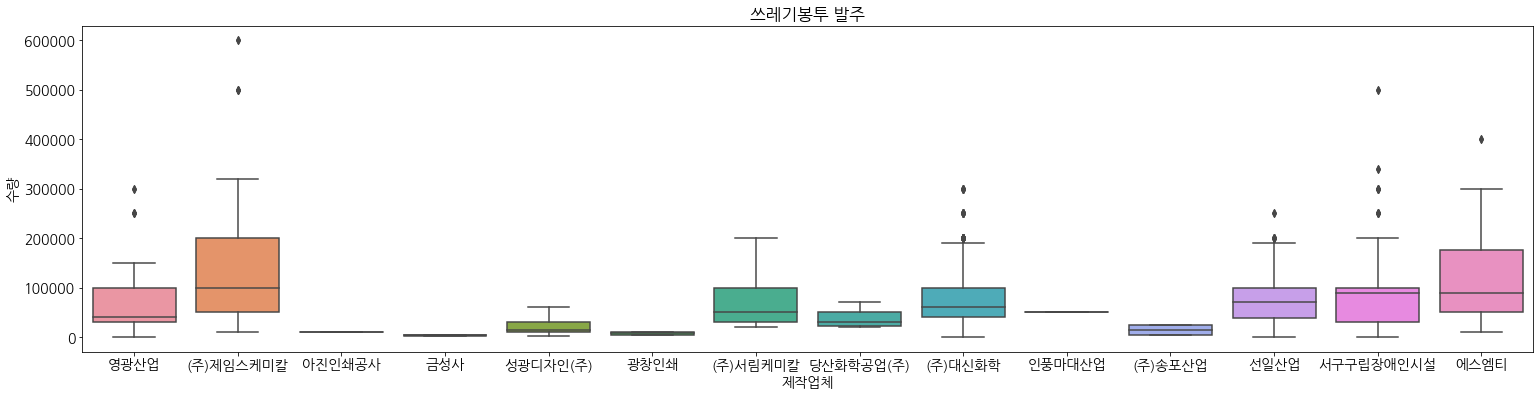

In [84]:
plt.figure(figsize=(26,6))
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams['font.size'] = 14
sns.boxplot(x='제작업체', y='수량', data=dat)
plt.title("쓰레기봉투 발주")
plt.show()

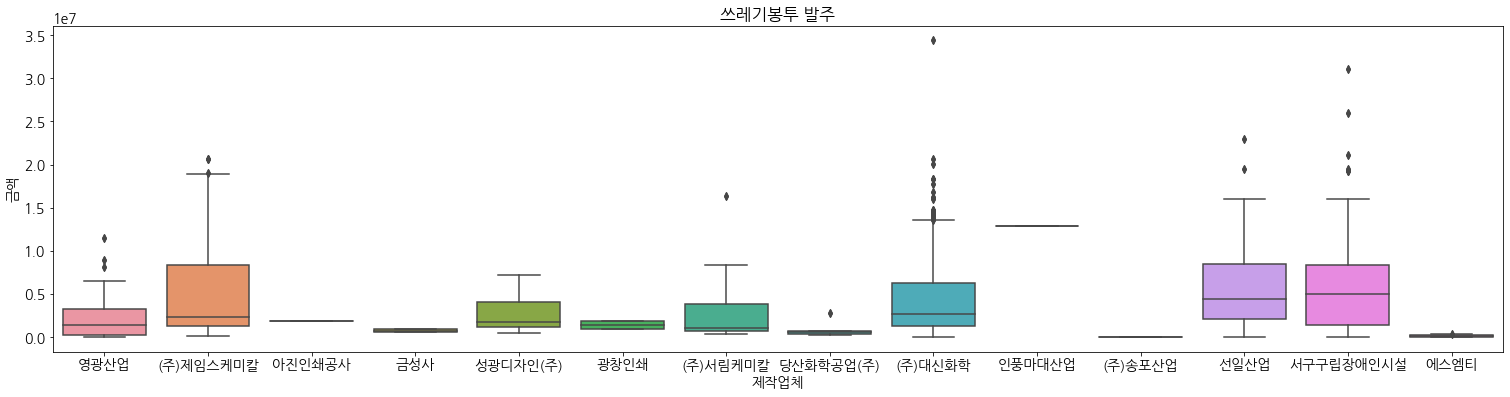

In [85]:
plt.figure(figsize=(26,6))
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams['font.size'] = 14
sns.boxplot(x='제작업체', y='금액', data=dat)
plt.title("쓰레기봉투 발주")
plt.show()

In [ ]:
%pwd

import sys

import csv

f= open('seoul.csv')
data = csv.reader(f)

for row in data:
    print(row)
    
f.close()

import csv

f= open('seoul.csv')
data = csv.reader(f)

next(data)
for row in data:
    row[-2] = float(row[-2])
    print(row)
    
f.close()

import csv

f= open('seoul.csv')
data = csv.reader(f)

next(data)
for row in data:
    if(row[-2] == '') :
        row[-2] = 999
    row[-2] = float(row[-2])
    print(row)
    
f.close()

import csv

f= open('seoul.csv')
data = csv.reader(f)
next(data)

min_temp = 999
min_data = ''
for row in data:
    if(row[-2] == '') :
        row[-2] = 999
    row[-2] = float(row[-2])
    
    if min_temp > row[-2] :
        min_temp = row[-2]
        min_data = row[0]
print('낮은기온 : ', min_temp, '날짜 : ', min_data) 
    
f.close()

#일교차 구하기

import csv

f= open('seoul.csv')
data = csv.reader(f)
next(data)

for row in data:
    if row[-2] == '' or row[-1] == '' :
        row[-1] = row[-2] = 0
    diff = float(row[-1]) - float(row[-2])
    print('%s  %8.1f   %8.1f  %8.1f' % (row[0], float(row[-2]), 
                float(row[-1]), diff )) 
f.close()

#데이터 시각화

import matplotlib.pyplot as plt

plt.title('color')
plt.plot([10, 20, 30, 40], color = 'blue', label = 'blue')
plt.plot([40, 30, 20, 10], color = 'pink', label = 'pink')
plt.legend()
plt.show()

import csv
import matplotlib.pyplot as plt

f= open('seoul.csv')
data = csv.reader(f)
next(data)

result = []
for row in data:
    if row[-2] != '':
        temp = float(row[-2])
        result.append(temp)
        
print(result)


# 한글 꺠짐, - 꺠짐 해결
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (20,8))
plt.title('서울의 최저기온')
plt.plot(result, 'b')
plt.show


# 9.25 의 최저기온, 최고기온 그래프
import csv
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

f= open('seoul.csv')
data = csv.reader(f)
next(data)

high = []
low = []
result = []
for row in data:
    date =  row[0].split('-')
    month = date[1]
    day = date[2]
    if row[-1] != '' and row[-2] != '':
        if month == '09' and day == '25':
            high.append(float(row[-1]))
            low.append(float(row[-2]))

plt.title('매년 9월 25일의 기온 그래프')
plt.plot(high, 'hotpink', label = '최고기온')
plt.plot(low, 'blue', label = '최저기온')
plt.legend()
plt.show()
        
		
		# 1910~2000 년 사이의 최저기온 그래프를 표현

import csv
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

f= open('seoul.csv')
data = csv.reader(f)
next(data)


result = []
for row in data:
    date =  row[0].split('-')
    year = date[0]
    if row[-2] != '' :
        if int(year) >= 1910 and int(year) <= 2000:
            result.append(float(row[-2]))
            
plt.title('1910~2000 년 사이의 최저기온')
plt.hist(result, bins =100, color = 'blue')
plt.xlabel('기온')
plt.ylabel('빈도')
plt.show()
 
 
 import csv
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
f= open('seoul.csv')
data = csv.reader(f)
next(data)
first = []
second = []
for row in data:
    date = row[0].split('-')
    year = date[0]
    if row[-2] != '' :
        if int(year) <= 1960 :
            first.append(float(row[-2]))
        else :
            second.append(float(row[-2]))
            
fig, axs = plt.subplots(1, 2, figsize=(10,4))
ax = axs[0]
ax.set_title('1960년 전')
ax.hist(first, bins=100, color ='b')
ax = axs[1]
ax.set_title('1960년 후')
ax.hist(second, bins =100, color='skyblue')
plt.show()